#Beta Bank Supervised Learning

---

Notebook by Julio César Martínez.

Supported by Alfonso Tobar, Instructor.

Code reviwer by (Iván Hernández)

# Table of Contents
---

1. Introduction.
2. Licence.
3. Required Libraries.
4. Problem Definition.
5. Respuesta de la Problemática.
6. Step 1: Data Preparation
7. Step 2: Class Balance
8. Step 3: Improve Model Quality.
9. Step 4: Final Test
10. Conclutions.
11. Bibliography.
12. Thanks.



## Introducción.
---

At the time of this project, about 5 billion searches are made on the Internet, 65 billion messages are sent on whatssapp, 4 petabytes of data are created on facebook and 294 billion emails are sent. All this in one day.

By 2025 it is estimated that 463 exabytes of daily information will be created worldwide, equivalent to almost 213 million DVDs per day.

Data science is a specialty combines statistics, mathematics, specialized programming, specialized analysis, artificial intelligence and machine learning with the aim of discovering actionable information hidden in an organizations data. This knowledge can be used to guide decision-making and strategic planning.

In this notebook, I will work with a problem of a financial organization that we will solve using data science processes such as machine learning and supervised learning to achieve automated responses.

![](https://cdn-dclcb.nitrocdn.com/nEJwBnJfMgrepTdEKiQJQkImAnkTSHTG/assets/images/optimized/rev-3e06988/wp-content/uploads/2022/07/what-is-data-science.jpg)

## Licencia.
---

Copyright 2023 - Julio Cesar Martínez I.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

## Required Libraries
---

For this project, we will use the next libraries:

- Pandas.
- NumPy.
- Scikit-Learn.
- Matplotlib.
- Seaborn.

## Problem Definition
---

Beta Bank customers are leaving, every month, little by little. Bankers found that it is cheaper to save existing customers than to attract new ones. We need to predict if a client will leave the bank soon. We have data on the past behavior of customers and the termination of contracts with the bank.

![](https://s.yimg.com/ny/api/res/1.2/x2QHw_XWJiCl3K5_qPErrA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTE2NQ--/https://media.zenfs.com/en/prnewswire.com/d3f637f211a3607f44826db0e332dbb1)

## Responding to the Problematic.
---

We must predict whether a customer will leave the bank or not. Under this argument, I will prepare the data set to create and train a classification model that will help us determine what will happen to each customer. For this I will experiment with the results that some models give us and I will select the one that seems to me more correct for this task.

Once the model has been selected, we will try to improve its quality and make final tests. We must create a model with the maximum possible F1 value, at least 0.59. In addition, we must measure the AUC-ROC metric and compare it with the F1 value.

The classification is chosen since our problem is binary type.

## Step 1: Preparation of Data.
---

Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle

Import Dataset

In [2]:
betabank = pd.read_csv('/content/Churn.csv')

### Data Exploration

rows and columns

In [3]:
betabank.shape

(10000, 14)

columns types

In [4]:
betabank.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

first rows of dataset

In [5]:
betabank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


general information

In [6]:
betabank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Observations**

> There are missing values in the `Tenure` column. We cannot have missing values when training our model, therefore, we must fix it in our own way, for this we will use the median that will serve to fill these values.

### Missing Values

Checking missing values

In [7]:
print('Missing values:', betabank['Tenure'].isna().sum())
print('Rate distribution of missing values:', (betabank['Tenure'].isna().sum() / betabank.shape[0])*100)

Missing values: 909
Rate distribution of missing values: 9.09


Fixing missing values

In [8]:
betabank['Tenure'] = betabank['Tenure'].fillna(betabank['Tenure'].median())
betabank['Tenure'].isna().sum()

0

> Now data is ready for the next step

## Step 2: Class Balance
---

### Data Description

**Features**

- `RowNumber:` índice de cadena de datos
- `CustomerId:` identificador de cliente único
- `Surname:` apellido
- `CreditScore:` valor de crédito
- `Geography:` país de residencia
- `Gender:` sexo
- `Age:` edad
- `Tenure:` período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- `Balance:` saldo de la cuenta
- `NumOfProducts:` número de productos bancarios utilizados por el cliente
- `HasCrCard:` el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- `IsActiveMember:` actividad del cliente (1 - sí; 0 - no)
- `EstimatedSalary:` salario estimado

**Label**

- `Exited:` El cliente se ha ido (1 - sí; 0 - no)

For this section, we will train our model regardless of the imbalance.

### Data Split

Let’s divide our dataset as follows:

- Training: 75%
- Validation: 25%

Before proceeding to the split, we must choose the model with which we will work, in my case it will be the Logistic Regression because we must perform a binary classification, that is, we must know if the client is going to leave or not.

We must first encode our data. Logistic regression uses a formula that consists of numerical characteristics. Our data contain categorical characteristics.

***One-Hot Encoding***

In [9]:
# seeing original data
betabank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


We have categorical variables, let’s see their cardinality to see if they can work before we perform the coding.

In [10]:
betabank['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [11]:
betabank['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
betabank['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

There are some variables that our model does not need to take into account, such as: Last name, Row Number and customer ID. We will filter our set and create a new one where we will remove these features.

In [13]:
bank_filter = betabank.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

Review changes

In [14]:
bank_filter.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Encoding `gender` column

In [15]:
betabank_ohe = pd.get_dummies(bank_filter, drop_first=True)
betabank_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Data Split

In [16]:
target   = betabank_ohe['Exited']
features = betabank_ohe.drop('Exited', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(
    features,
    target,
    test_size = 0.20,
    random_state = 42
)

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_valid.shape, y_valid.shape)

Training set: (8000, 11) (8000,)
Test set: (2000, 11) (2000,)


Checking data split

In [17]:
print('Original dataset:', betabank.shape[0])
print('Split dataset:' , X_train.shape[0] + X_valid.shape[0])

Original dataset: 10000
Split dataset: 10000


**Data Standardization**

In the previous step, we did not touch any parameters of our model. Now we will make an adjustment by standardizing our data. This will be our first approach, and we will make our numerical variables equally important to our model.

In [18]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])

Checking standardization

In [19]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.356500,-0.655786,6.0,-1.218471,2,1,1,1.367670,0,0,1
1561,-0.203898,0.294938,4.0,0.696838,2,1,1,1.661254,1,0,1
1670,-0.961472,-1.416365,3.0,0.618629,1,1,0,-0.252807,0,1,1
6087,-0.940717,-1.131148,9.0,0.953212,1,1,0,0.915393,0,0,0
6669,-1.397337,1.625953,9.0,1.057449,1,0,0,-1.059600,0,0,1


In [20]:
X_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.577496,-0.655786,3.0,0.329937,2,0,0,-1.019605,1,0,1
4684,-0.297297,0.390011,1.0,-1.218471,2,1,1,0.798883,0,0,1
1731,-0.525607,0.485083,4.0,-1.218471,2,1,0,-0.727980,0,1,0
4742,-1.511492,1.911170,8.0,0.689272,2,1,1,1.221387,1,0,1
4521,-0.951094,-1.131148,7.0,0.782839,1,1,1,0.247560,0,1,0


### Training Model.

In this section, I will train our model without taking into account the imbalance of classes.

**Logistic Regression**

In [21]:
lo_model = LogisticRegression(random_state=42, solver='liblinear')
lo_model.fit(X_train, y_train)

y_predict_tr = lo_model.predict(X_train)
y_predict = lo_model.predict(X_valid)

In [22]:
pc_score = precision_score(y_valid, y_predict) 
rc_score = recall_score(y_valid, y_predict)    
f1_sc    = f1_score(y_valid, y_predict)        
ac_score = accuracy_score(y_valid, y_predict)  

In [23]:
print('----------------------')
print('Métricas de Evaluación')
print('----------------------')
print('Presición:',pc_score)
print('Recall:   ',rc_score)
print('F1 Score: ',f1_sc)
print('Exactitud:',ac_score)

----------------------
Métricas de Evaluación
----------------------
Presición: 0.5531914893617021
Recall:    0.1984732824427481
F1 Score:  0.29213483146067415
Exactitud: 0.811


The harmonic mean between precision and recall is only 0.29. It seems that the regression model is not so good for this task without modifying some parameter, although its accuracy seems to be good.

## Step 3: Improve Model Quality
---

In the previous exercise, we performed training and tests without modifying any parameters. For this case I will work with the logistic regression model since its execution speed is the fastest and making the necessary adjustments we could get a good result in F1.

### Consistency Test

Let us test the balance of the classes of our model.

In [24]:
class_frequency = target.value_counts(normalize=True)
class_frequency

0    0.7963
1    0.2037
Name: Exited, dtype: float64

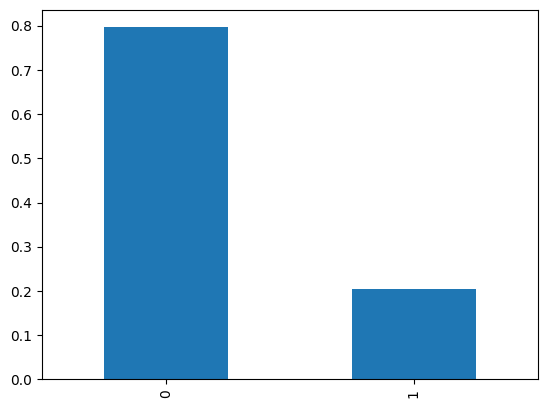

In [25]:
class_frequency.plot(kind='bar');

The graph shows that 20% of customers have left. Now, in the next snippet, we will make a constant model to check if the model is balanced.

In [26]:
target_pred_constant = pd.Series(0, index=target.index)

print('Accuracy to the constant model:  ', accuracy_score(target, target_pred_constant))
print('Accuracy to the regression model:', ac_score)

Accuracy to the constant model:   0.7963
Accuracy to the regression model: 0.811


The accuracy of our regression model is the same as that of the constant model, this means that our model is balanced. Let’s see what happens with the classes.

### Balance and Class Imbalance.

**Confusion Matrix**

Once a model has been trained, we can get predictions about the dataset. In the case of a binary problem, our model would classify a dataset as 0 or 1, and from this we can already create the confusion matrix.

In this table, the numbers in the first column represent the predicted values, while the values in the first row represent the real values.

**How to read the results?**

- **TP (True Positive)** - These are the values that the algorithm classifies as positive and are actually positive.
- **TN (True Negative)** - These are values that the algorithm classifies as negative (0 in this case) and that are really negative.
- **FP (False Positive)** - False positives, that is, values that the algorithm classifies as positive when they are actually negative.
- **FN (False Negative)** - False negatives, that is, values that the algorithm classifies as negative when they are actually positive.

In [27]:
# Creating function
def metricas(clase_real, clase_predicha):
    """Calculating matrix using sklearn"""
    matriz    = confusion_matrix(clase_real, clase_predicha)
    accuracy  = accuracy_score(clase_real, clase_predicha)
    precision = precision_score(clase_real, clase_predicha)
    recall    = recall_score(clase_real, clase_predicha)
    f1        = f1_score(clase_real, clase_predicha)
    return matriz, accuracy, precision, recall, f1

def visualiza_metricas(clase_real, clase_predicha, titulo):
    """Confusion matrix and metrics visualization"""
    
    ## Código para calcular las métricas y matriz de confusión.
    
    matriz, accuracy, precision, recall, f1 = metricas(clase_real, clase_predicha)
    
    ## Código de matplotlib para graficar.
    plt. figure(figsize=(4,4))
    matriz = pd.DataFrame(matriz, columns=["0: Se queda", "1: Se va"])
    plt.matshow(matriz, cmap="gray", vmin=1, vmax=10, fignum=1)
    plt.title("Predichas")
    plt.ylabel("Reales")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("True\nnegatives", "False\npositives"),
                ("False\nnegatives", "True\npositives"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]), 
                     fontsize=30, ha='center', va='center')
            plt.text(i, j - 0.25, etiquetas[i][j], 
                     fontsize=11.5, ha='center', va='center')
    plt.text(1.60, -0.30, titulo, fontsize=25, c='Red')
    plt.text(2.1, 0.10, "Accuracy: %0.2f"% accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f"% precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f"% recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f"% f1, fontsize=20)
    plt.show()

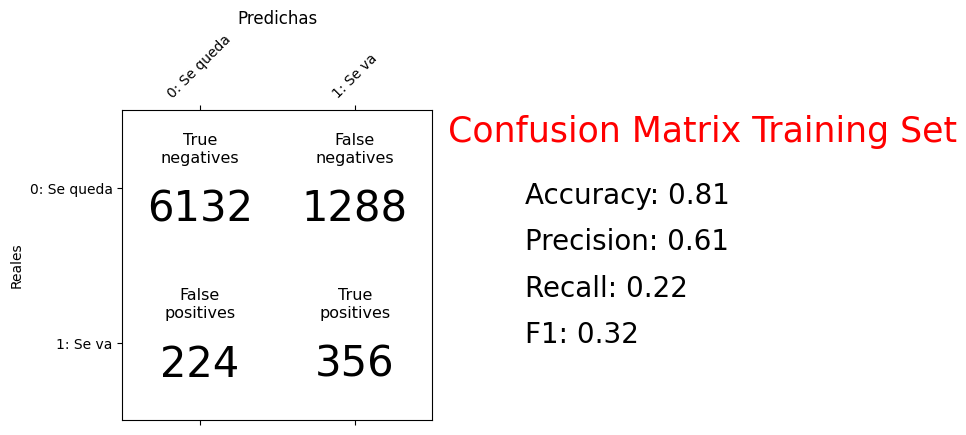

In [28]:
visualiza_metricas(y_train, y_predict_tr, "Confusion Matrix Training Set")

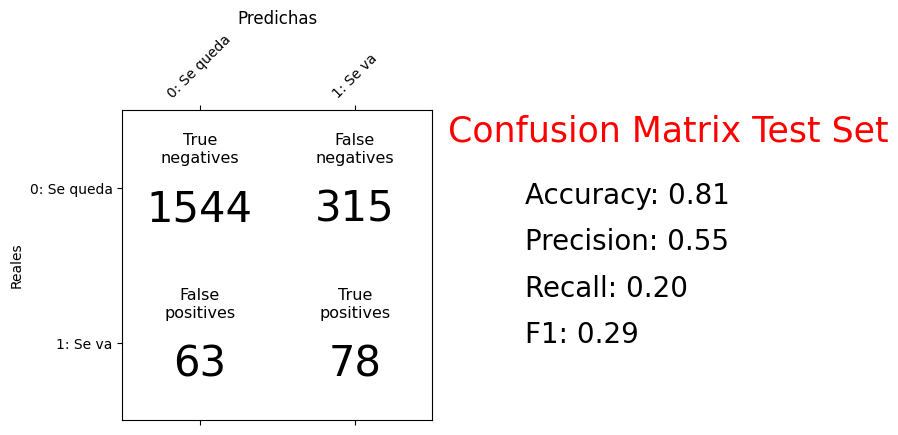

In [29]:
visualiza_metricas(y_valid, y_predict, "Confusion Matrix Test Set")

**Weight Adjustment**

Now we are going to make an adjustment in the weight, this is because our model is predicting more negative cases than positive, we must balance it because what we want to predict is the class 1 that is those customers of Beta Bank who seek their exit from the bank.

In this way we will manage to reduce the objectives that are FN, an FN for the bank represents a risk, because if our model predicts that the client does not leave, but in fact if he leaves that would cost him money, that is what Beta Bank does not want to happen.

In [30]:
## Training model regresion again
regression_model_1 = LogisticRegression(random_state=42, solver='liblinear', class_weight={0:1, 1:3})
regression_model_1.fit(X_train, y_train)

## Get Predictions
y_predict_1_tr = regression_model_1.predict(X_train)
y_predict_1 = regression_model_1.predict(X_valid)

print('Entrenamiento Completado')
print('Predicciones Completadas')

Entrenamiento Completado
Predicciones Completadas


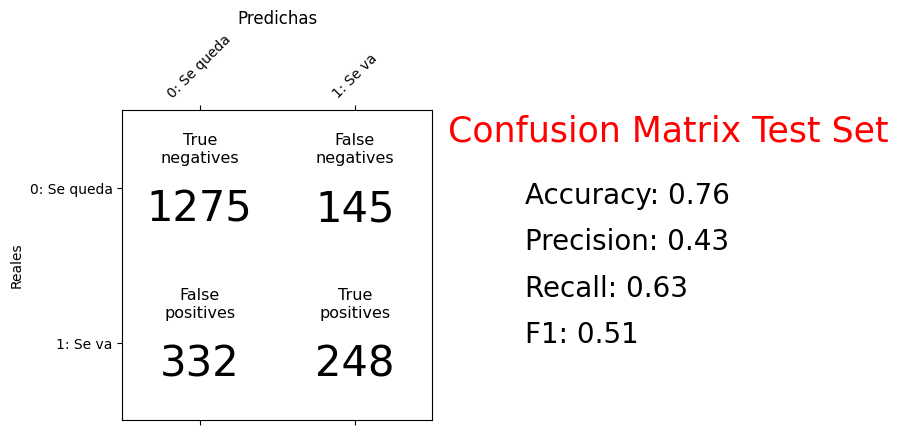

In [31]:
visualiza_metricas(y_valid, y_predict_1, "Confusion Matrix Test Set")

Eh, here is the power of sklearn and its parameters, with just a few moves we raise our F1 score from 0.29 to 0.51, although it is already good enough, we still need a little to raise it to the limit of 0.59 that establishes betabank.

**Subsampling**

Let us now try what would happen if we performed a subsample.

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    X_train, y_train, 0.9
)

regression_model_2 = LogisticRegression(random_state=42, solver='liblinear', class_weight={0:1, 1:3})
regression_model_2.fit(features_downsampled, target_downsampled)

y_predict_2 = regression_model_2.predict(X_valid)
print('Modelo 2 Entrenado...!')

Modelo 2 Entrenado...!


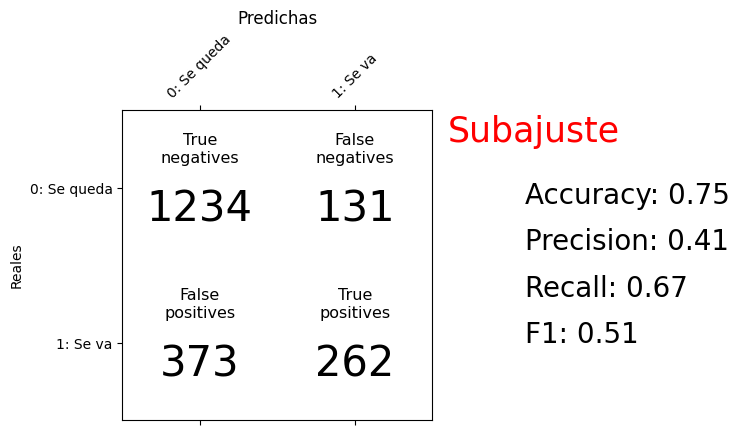

In [33]:
# Model evaluation
visualiza_metricas(y_valid, y_predict_2, 'Downsampling')

We managed to increase the F1 a little by placing our fraction in 0.9

**Oversampling**

Let’s try over-sampling now.

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    X_train, y_train, 3
)

regression_model_3 = LogisticRegression(random_state=42, solver='liblinear', class_weight={0:1, 1:2})
regression_model_3.fit(features_upsampled, target_upsampled)

y_predict_3 = regression_model_3.predict(X_valid)

print('Modelo 3 Entrenado')

Modelo 3 Entrenado


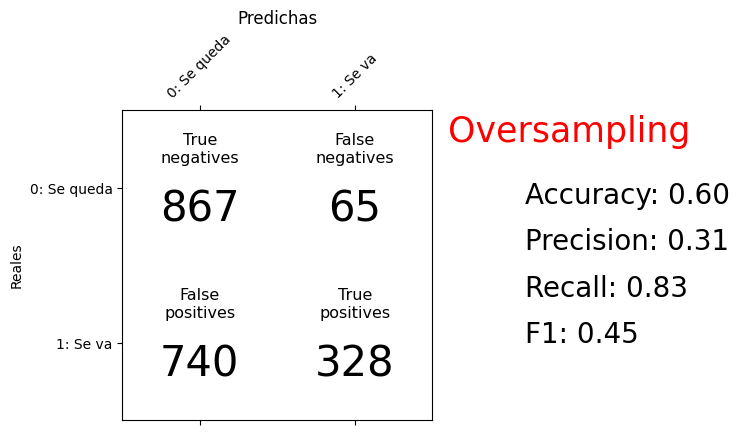

In [35]:
## Model evaluation
visualiza_metricas(y_valid, y_predict_3, 'Oversampling')

We have made the necessary adjustments, but we see that the value of f1 in none of the cases exceeds 50 points, this indicates that it may not be the best model to evaluate. Let’s try another model to see if we can overcome these metrics.

### Decision Tree.

Ordinal Encoding

In [36]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(betabank), columns=betabank.columns)

Data Split

In [37]:
target_a   = data_ordinal['Exited']
features_a = data_ordinal.drop('Exited', axis=1)

X_train_a, X_valid_a, y_train_a, y_valid_a = train_test_split(
    features_a, 
    target_a, 
    test_size=0.25, 
    random_state=42
)

print('Training Set', X_train_a.shape, y_train_a.shape)
print('Test Set:', X_valid_a.shape, y_valid_a.shape)

Training Set (7500, 13) (7500,)
Test Set: (2500, 13) (2500,)


Training Model

In [38]:
ad_model = DecisionTreeClassifier(random_state=42)
ad_model.fit(X_train_a, y_train_a)

y_prediction_a = ad_model.predict(X_valid_a)

Metrics results

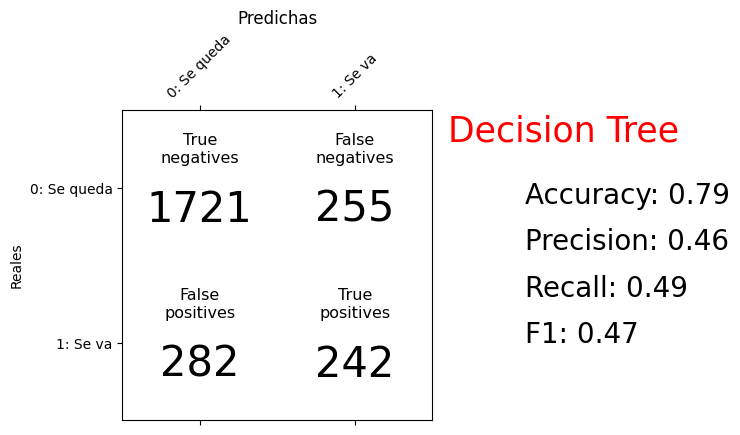

In [39]:
visualiza_metricas(y_valid_a, y_prediction_a, 'Decision Tree')

Although the results are good, we will find the best quality of our model by adjusting its depth.

In [40]:
best_model = None
best_result = 0
for depth in range(1, 100):
    ad_model = DecisionTreeClassifier(random_state=42, max_depth = depth)
    ad_model.fit(X_train_a, y_train_a)             # train model 
    predictions = ad_model.predict(X_valid_a)      # get predictions
    result = f1_score(y_valid_a, predictions)      # F1 score
    if result > best_result:
        best_model  = ad_model
        best_result = result
        
print("F1 score for the best testing set:", best_result)
print("Best model is:", best_model)

F1 score for the best testing set: 0.560553633217993
Best model is: DecisionTreeClassifier(max_depth=9, random_state=42)


Training model

In [41]:
ad_model = DecisionTreeClassifier(random_state=42, max_depth=9)
ad_model.fit(X_train_a, y_train_a)

y_prediction_a = ad_model.predict(X_valid_a)

print('Training model successful')

Training model successful


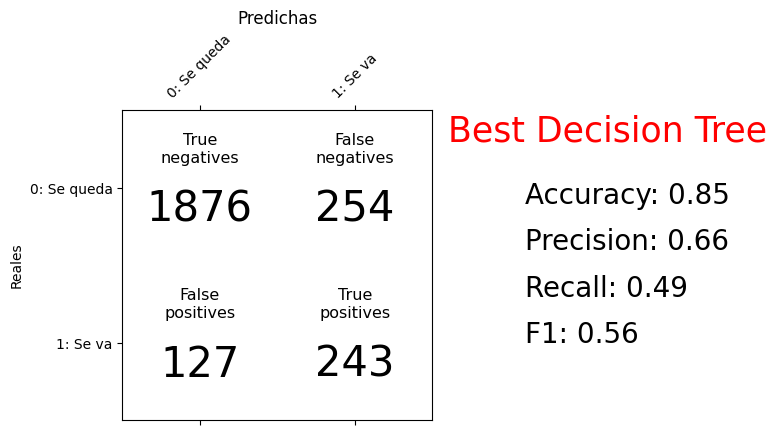

In [42]:
visualiza_metricas(y_valid_a, y_prediction_a, 'Best Decision Tree')

Our best decision tree model got an F1 that comes very close to the target metric, but fails to reach it, now we will explore one more model that we already knew in the previous project.

### Random Forest

For our random forest model we already have the coding we use in the decision tree, we can use it to move directly to the training of our forest.

In [43]:
## Training model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_a, y_train_a)

## Get predictions
y_prediction_b = rf_model.predict(X_valid_a)

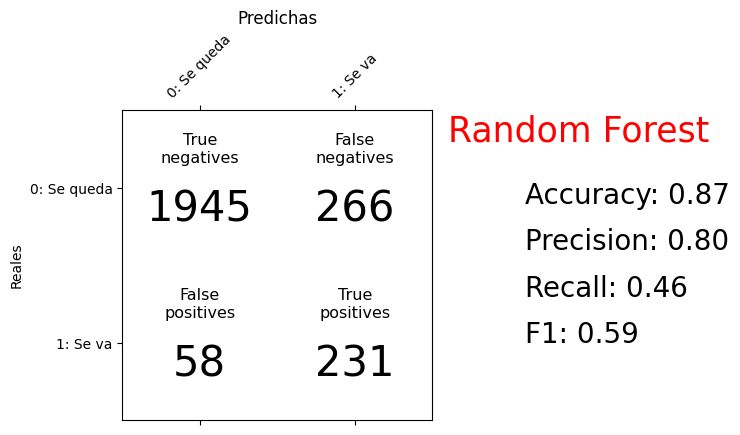

In [44]:
visualiza_metricas(y_valid_a, y_prediction_b, 'Random Forest')

The random forest alone achieves the minimum score of 0.59 for the test set. If we find the best model increasing the depth, we can increase the F1 a little more.

## Etapa 4: Final Test
---
Let’s find the best model that can provide us the best F1 Score.

In [45]:
best_model = None
best_result = 0
for est in range(1, 100):
    rf_model = RandomForestClassifier(random_state=42, n_estimators=est)
    rf_model.fit(X_train_a, y_train_a)               # training model
    predictions_a = rf_model.predict(X_valid_a)      # get predictions 
    result = f1_score(y_valid_a, predictions_a)      # F1 score
    if result > best_result:
        best_model  = rf_model
        best_result = result
        
print("Best F1 score on validation set", best_result)
print("Best model is:", best_model)

Best F1 score on validation set 0.5872020075282308
Best model is: RandomForestClassifier(n_estimators=23, random_state=42)


Training model

In [46]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=23)
rf_model.fit(X_train_a, y_train_a)

## get predictions
y_prediction_b = rf_model.predict(X_valid_a)

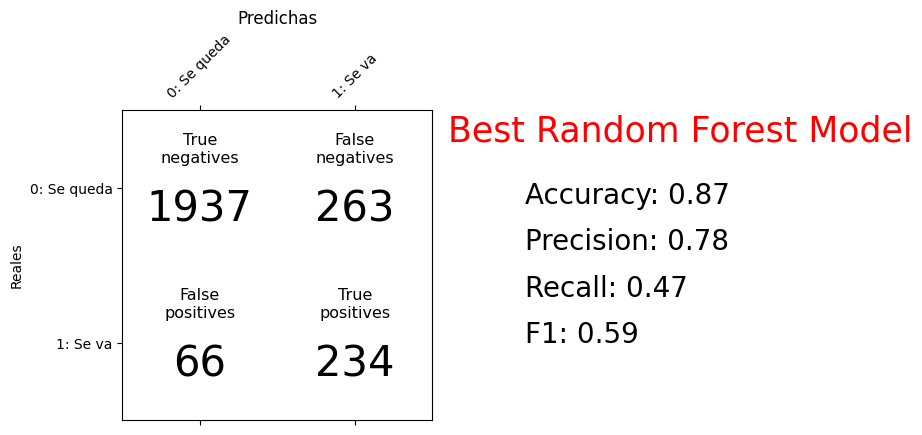

In [47]:
visualiza_metricas(y_valid_a, y_prediction_b, 'Best Random Forest Model')

Random forest is the classification model that comes closest to the objective we are looking for, now we will visualize these results through the ROC curve.

In [48]:
## Obtenemos las probabilidades.
probabilities_valid = rf_model.predict_proba(X_valid_a)
probabilities_one_valid = probabilities_valid[:, 1]

## Obtenemos el valor de la Curva ROC
auc_roc = roc_auc_score(y_valid_a, probabilities_one_valid)
print('El puntaje de la Curva ROC es:', auc_roc)

El puntaje de la Curva ROC es: 0.8300999205417228


**AUC ROC Visualization**

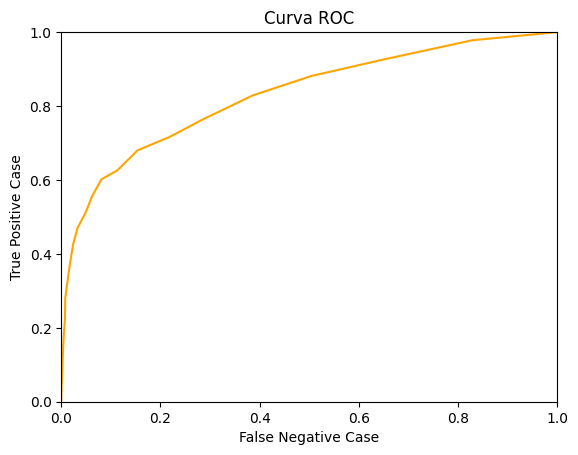

Text(0.5, 1.0, 'Curva ROC')

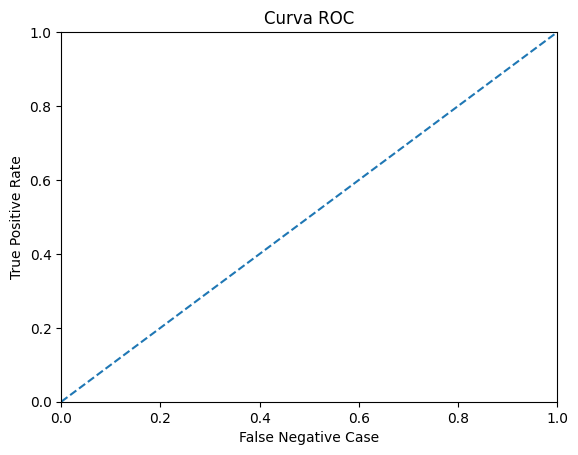

In [49]:
fpr, tpr, thresholds = roc_curve(y_valid_a, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, color='orange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Case')
plt.ylabel('True Positive Case')
plt.title('Curva ROC')
plt.show() 

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Negative Case')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')

## Conclusions
---

After testing different techniques and models, we came to the conclusion that thanks to the evidence, the random forest is the best model to predict the task of classification on the customers that will leave in the coming months of betabank.

This is because the F1 score which shows a harmonic mean between accuracy and sensitivity has a value above 0.5 which I think is a good index.

Perhaps in the future there will be more tools to further improve these parameters, but for now most of the techniques we know so far have been put into practice.

Let’s hope we helped Betabank with his project.